In [1]:
import numpy as np
import requests
from bs4 import BeautifulSoup
import time
import re
import pandas as pd
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from datetime import datetime
from sentence_transformers import SentenceTransformer, util
from nltk.tokenize import sent_tokenize
import torch
import nltk

In [2]:
data = pd.read_csv(r'C:\Users\user\boyu571_github\01_Kakaobank_SKKU_Research_23\first_processed_eng_data.csv')
data

,source,author,title,description,url,urlToImage,time,content,press,content_full,date
0,"{'id': 'australian-financial-review', 'name': ...","Ben Potter, AFR.com",This Australian startup will offer shares in l...,Perth-based BitCar is seeking more than $US20 ...,https://www.afr.com/news/bitcar-ico-seeks-25m-...,https://edge.alluremedia.com.au/uploads/busine...,2017-11-09 11:44:01+00:00,Perth-based BitCar is seeking more than $US20 ...,Australian Financial Review,Perth-based BitCar is seeking more than $US20 ...,2017-11-09
1,"{'id': None, 'name': 'Gizmodo Australia'}",Gizmodo Australia,Deals: Learn How To Buy And Sell Bitcoin For 9...,Bitcoin and other cryptocurrencies have floate...,https://www.gizmodo.com.au/2017/11/deals-learn...,https://edge.alluremedia.com.au/m/g/2016/12/iS...,2017-11-09 13:45:42+00:00,Bitcoin and other cryptocurrencies have floate...,Gizmodo Australia,Bitcoin and other cryptocurrencies have floate...,2017-11-09
2,"{'id': None, 'name': 'Yahoo Entertainment'}",NaN,Bitcoin price is dependent on maintaining a sh...,Former Federal Reserve Chairman Alan Greenspan...,https://finance.yahoo.com/video/bitcoin-price-...,https://s.yimg.com/uu/api/res/1.2/EI4AFtNzs8SG...,2017-11-09 15:58:00+00:00,Lori: I seriously cannot believe how low peopl...,Yahoo Entertainment,Former Federal Reserve Chairman Alan Greenspan...,2017-11-09
3,"{'id': 'breitbart-news', 'name': 'Breitbart Ne...",Ezra Dulis,"Bitcoin Surges, Then Sags After Investors Lose...","The price of Bitcoin surged to nearly $8,000 p...",http://www.breitbart.com/tech/2017/11/09/bitco...,http://media.breitbart.com/media/2017/11/10867...,2017-11-09 18:32:29+00:00,"If you have no idea what any of that means, he...",Breitbart News,"The price of Bitcoin surged to nearly $8,000 p...",2017-11-09
4,"{'id': None, 'name': 'Yahoo Entertainment'}",NaN,Mark Cuban: Here's the best way to invest your...,Investing great Warren Buffett agrees with Cub...,https://finance.yahoo.com/news/mark-cuban-apos...,https://s.yimg.com/uu/api/res/1.2/zPT4W4Ze4339...,2017-11-09 18:40:09+00:00,You hear it all the time: Put your money to wo...,Yahoo Entertainment,You hear it all the time: Put your money to wo...,2017-11-09
...,...,...,...,...,...,...,...,...,...,...,...
341782,"{'id': None, 'name': 'ZyCrypto'}",Newton Gitonga,CFTC Charges Three Defi Projects for Illegal O...,The Commodity Futures Trading Commission (CFTC...,https://zycrypto.com/cftc-charges-three-defi-p...,https://zycrypto.com/wp-content/uploads/2021/1...,2023-09-30 21:08:56+00:00,The Commodity Futures Trading Commission (CFTC...,ZyCrypto,The Commodity Futures Trading Commission (CFTC...,2023-09-30
341783,"{'id': None, 'name': 'Investing.com'}",Cointelegraph,"Ether futures ETFs launching, SBF trial to beg...","Ether futures ETFs launching, SBF trial to beg...",https://www.investing.com/news/cryptocurrency-...,https://i-invdn-com.investing.com/news/Cryptoc...,2023-09-30 21:20:17+00:00,Investment firm Valkyrie will start offering e...,Investing.com,"Ether futures ETFs launching, SBF trial to beg...",2023-09-30
341784,"{'id': None, 'name': 'ZyCrypto'}",Newton Gitonga,XRP Lawsuit: John Deaton Concurs “The SEC Harm...,"John Deaton, a prominent pro-Ripple lawyer rep...",https://zycrypto.com/xrp-lawsuit-john-deaton-c...,https://zycrypto.com/wp-content/uploads/2023/0...,2023-09-30 21:23:16+00:00,"John Deaton, a prominent pro-Ripple lawyer rep...",ZyCrypto,"John Deaton, a prominent pro-Ripple lawyer rep...",2023-09-30
341785,"{'id': None, 'name': 'Investing.com'}",U.Today,Shiba Inu (SHIB) Negatively Correlates With Bi...,Shiba Inu (SHIB) Negatively Correlates With Bi...,https://www.investing.com/news/cryptocurrency-...,https://i-invdn-com.investing.com/news/LYNXNPE...,2023-09-30 22:00:22+00:00,U.Today - Dog-themed cryptocurrency is seeing ...,Investing.com,Shiba Inu (SHIB) Negatively Correlates With Bi...,2023-09-30


In [3]:
df = data

In [4]:
# 날짜 범위 지정
start_date = '2017-12-01'
end_date = '2023-08-28'

# 날짜 범위에 해당하는 행 필터링
filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

print(filtered_df)

                                          source  \
2978        {'id': None, 'name': 'OilPrice.com'}   
2979       {'id': None, 'name': 'Cointelegraph'}   
2980             {'id': None, 'name': 'newsBTC'}   
2981          {'id': None, 'name': 'Bitcoinist'}   
2982          {'id': None, 'name': 'PRNewswire'}   
...                                          ...   
334970    {'id': None, 'name': 'Techreport.com'}   
334971     {'id': None, 'name': 'Cointelegraph'}   
334972     {'id': None, 'name': 'Ambcrypto.com'}   
334973  {'id': None, 'name': 'Activistpost.com'}   
334974    {'id': None, 'name': 'Techreport.com'}   

                                author  \
2978                   Charles Kennedy   
2979         CoinTelegraph By Iyke Aru   
2980                        Kiana Diva   
2981                  Matthew Tompkins   
2982       Legal &amp; Compliance, LLC   
...                                ...   
334970                Krishi Chowdhary   
334971  Cointelegraph By Jesse Coghlan 

In [5]:
# Define the date range and specific date to filter
start_date = '2017-12-01'
end_date = '2023-08-28'

# Convert the 'date' column to datetime if it is not already
data['date'] = pd.to_datetime(data['date'])

# Create the subset_data DataFrame by filtering the date range and specific date
subset_data = data[
    (data['date'] >= start_date) &
    (data['date'] <= end_date)
]

subset_data

# test_data = data[data['date'].str.startswith('2017-11')]
# test_data

,source,author,title,description,url,urlToImage,time,content,press,content_full,date
2978,"{'id': None, 'name': 'OilPrice.com'}",Charles Kennedy,Game Changing Oil Tech Could Upend OPEC,"In the twentieth century, fossil fuels powered...",https://oilprice.com/Energy/Energy-General/Gam...,https://d32r1sh890xpii.cloudfront.net/article/...,2017-12-01 00:30:00+00:00,"In the twentieth century, fossil fuels powered...",OilPrice.com,OPEC is on the verge of extending its produc...,2017-12-01
2979,"{'id': None, 'name': 'Cointelegraph'}",CoinTelegraph By Iyke Aru,Why Slowing ICO Avalanche Benefits Blockchain'...,Those who don’t want intrusive government regu...,https://cointelegraph.com/news/why-slowing-ico...,https://cointelegraph.com/images/725_Ly9jb2lud...,2017-12-01 00:38:17+00:00,The onset of Blockchain into the world’s finan...,Cointelegraph,The onset of Blockchain into the world’s finan...,2017-12-01
2980,"{'id': None, 'name': 'newsBTC'}",Kiana Diva,Ethereum Remains Above Key Support After Break...,"Along with Bitcoin, Ethereum had a crazy day t...",http://www.newsbtc.com/2017/12/01/ethereum-rem...,http://www.newsbtc.com/https://s3.amazonaws.co...,2017-12-01 00:55:18+00:00,"Along with Bitcoin, Ethereum had a crazy day t...",newsBTC,"Along with Bitcoin, Ethereum had a crazy day t...",2017-12-01
2981,"{'id': None, 'name': 'Bitcoinist'}",Matthew Tompkins,CryptoKitties Game Launches On The Ethereum Bl...,CryptoKitties is an interesting new gaming exp...,http://bitcoinist.com/cryptokitties-game-launc...,http://bitcoinist.com/wp-content/uploads/2017/...,2017-12-01 01:00:25+00:00,"Matthew Tompkins · November 30, 2017 · 8:00 pm...",Bitcoinist,CryptoKitties is an interesting new gaming exp...,2017-12-01
2982,"{'id': None, 'name': 'PRNewswire'}","Legal &amp; Compliance, LLC",Attorney Paula Argento Joins the Law Firm of L...,"WEST PALM BEACH, Fla., Nov. 30, 2017 /PRNewswi...",https://www.prnewswire.com/news-releases/attor...,https://content.prnewswire.com/images/prn_face...,2017-12-01 01:22:00+00:00,"WEST PALM BEACH, Fla., Nov. 30, 2017 /PRNewswi...",PRNewswire,"WEST PALM BEACH, Fla., Nov. 30, 2017 /PRNewsw...",2017-12-01
...,...,...,...,...,...,...,...,...,...,...,...
334970,"{'id': None, 'name': 'Techreport.com'}",Krishi Chowdhary,Tor Introduces Proof-of-Work Puzzles to Defend...,The Onion Router (Tor) has now turned to proof...,https://techreport.com/news/tor-introduces-pro...,https://techreport.com/wp-content/uploads/2023...,2023-08-28 23:24:06+00:00,The Onion Router (Tor) has now turned to proof...,Techreport.com,The Onion Router (Tor) has now turned to proof...,2023-08-28
334971,"{'id': None, 'name': 'Cointelegraph'}",Cointelegraph By Jesse Coghlan,Crypto bull run: Traders share their plans for...,Millions of new crypto investors could be expe...,https://cointelegraph.com/news/how-crypto-trad...,https://images.cointelegraph.com/images/1200_a...,2023-08-28 23:26:00+00:00,With as much as 130 million people introduced ...,Cointelegraph,With more than 130 million people estimated to...,2023-08-28
334972,"{'id': None, 'name': 'Ambcrypto.com'}",Benjamin Njiri,Filecoin finds recovery elusive after hitting ...,FIL was stuck between a long-term support zone...,https://ambcrypto.com/filecoin-finds-recovery-...,https://statics.ambcrypto.com/wp-content/uploa...,2023-08-28 23:30:22+00:00,Disclaimer: The information presented does not...,Ambcrypto.com,Disclaimer: The information presented does not...,2023-08-28
334973,"{'id': None, 'name': 'Activistpost.com'}",Activist Post,Tons of Medical Freedom Events September in th...,By Michael Kane NY Quarantine Camp Appeal on S...,https://www.activistpost.com/2023/08/tons-of-m...,https://www.activistpost.com/wp-content/upload...,2023-08-28 23:33:40+00:00,By Michael Kane\r\nNY Quarantine Camp Appeal o...,Activistpost.com,By Michael Kane NY Quarantine Camp Appeal on S...,2023-08-28


In [6]:
# sBERT 모델 로드
model = SentenceTransformer('paraphrase-distilroberta-base-v1')

# 코사인 유사도 계산 함수
def cosine_similarity(embedding1, embedding2):
    return util.pytorch_cos_sim(embedding1, embedding2)

# 문서 임베딩 생성 함수
# def create_document_embeddings(sentences):
#     sentence_embeddings = model.encode(sentences, convert_to_tensor=True)
#     document_embedding = torch.mean(sentence_embeddings, dim=0)
#     return document_embedding

def create_document_embeddings(sentences):
    if not sentences:  # Check if the list of sentences is empty
        return None  # Return None if there are no sentences to encode
    try:
        sentence_embeddings = model.encode(sentences, convert_to_tensor=True)
        document_embedding = torch.sum(sentence_embeddings, dim=0)
        return document_embedding
    except Exception as e:
        print(f"Error in create_document_embeddings: {e}")
        print(f"Sentences: {sentences}")
        return None  # Return None in case of any other error


def cluster_and_filter_articles(group):
    filtered_group = pd.DataFrame()
    try:
        document_embeddings = []
        for content in group['content_full']:
            embedding = create_document_embeddings(sent_tokenize(content))
            if embedding is not None:
                document_embeddings.append(embedding)
        
        if not document_embeddings:
            return filtered_group  # If no embeddings, return empty DataFrame

        similarity_matrix = compute_similarity_matrix(document_embeddings)
        clusters = []
        visited = np.zeros(len(document_embeddings), dtype=bool)

        for i in range(len(document_embeddings)):
            if not visited[i]:
                similar_articles = np.where(np.array(similarity_matrix[i]) > 0.6)[0]
                clusters.append(similar_articles)
                visited[similar_articles] = True

        representative_indices = [cluster[0] for cluster in clusters if len(cluster) > 0]
        if representative_indices:
            filtered_group = group.iloc[representative_indices].reset_index(drop=True)
    except Exception as e:
        print(f"Error in cluster_and_filter_articles: {e}")
    
    return filtered_group

# 유사도 행렬 계산 함수
def compute_similarity_matrix(document_embeddings):
    similarity_matrix = []
    for embedding1 in document_embeddings:
        row = []
        for embedding2 in document_embeddings:
            similarity = cosine_similarity(embedding1, embedding2).item()
            row.append(similarity)
        similarity_matrix.append(row)
    return similarity_matrix

In [7]:
grouped_data = subset_data.groupby('date')
filtered_data = pd.DataFrame()

for date, group in grouped_data:
    try:
        filtered_group = cluster_and_filter_articles(group)
        if not filtered_group.empty:
            filtered_data = pd.concat([filtered_data, filtered_group], ignore_index=True)
    except Exception as e:
        print(f"Error at date {date}: {e}")

print(filtered_data)

                                            source  \
0             {'id': None, 'name': 'OilPrice.com'}   
1            {'id': None, 'name': 'Cointelegraph'}   
2               {'id': None, 'name': 'PRNewswire'}   
3                   {'id': None, 'name': 'Medium'}   
4                  {'id': None, 'name': 'newsBTC'}   
...                                            ...   
102838     {'id': None, 'name': 'Theregister.com'}   
102839  {'id': None, 'name': 'Marketscreener.com'}   
102840             {'id': None, 'name': 'Decrypt'}   
102841       {'id': None, 'name': 'Cointelegraph'}   
102842      {'id': None, 'name': 'Gadgets360.com'}   

                                     author  \
0                           Charles Kennedy   
1                 CoinTelegraph By Iyke Aru   
2               Legal &amp; Compliance, LLC   
3                                  coinmall   
4                                Kiana Diva   
...                                     ...   
102838                

In [8]:
filtered_data

,source,author,title,description,url,urlToImage,time,content,press,content_full,date
0,"{'id': None, 'name': 'OilPrice.com'}",Charles Kennedy,Game Changing Oil Tech Could Upend OPEC,"In the twentieth century, fossil fuels powered...",https://oilprice.com/Energy/Energy-General/Gam...,https://d32r1sh890xpii.cloudfront.net/article/...,2017-12-01 00:30:00+00:00,"In the twentieth century, fossil fuels powered...",OilPrice.com,OPEC is on the verge of extending its produc...,2017-12-01
1,"{'id': None, 'name': 'Cointelegraph'}",CoinTelegraph By Iyke Aru,Why Slowing ICO Avalanche Benefits Blockchain'...,Those who don’t want intrusive government regu...,https://cointelegraph.com/news/why-slowing-ico...,https://cointelegraph.com/images/725_Ly9jb2lud...,2017-12-01 00:38:17+00:00,The onset of Blockchain into the world’s finan...,Cointelegraph,The onset of Blockchain into the world’s finan...,2017-12-01
2,"{'id': None, 'name': 'PRNewswire'}","Legal &amp; Compliance, LLC",Attorney Paula Argento Joins the Law Firm of L...,"WEST PALM BEACH, Fla., Nov. 30, 2017 /PRNewswi...",https://www.prnewswire.com/news-releases/attor...,https://content.prnewswire.com/images/prn_face...,2017-12-01 01:22:00+00:00,"WEST PALM BEACH, Fla., Nov. 30, 2017 /PRNewswi...",PRNewswire,"WEST PALM BEACH, Fla., Nov. 30, 2017 /PRNewsw...",2017-12-01
3,"{'id': None, 'name': 'Medium'}",coinmall,How Easy and Cheap It Is to Manipulate Reddit ...,Article URL: https://medium.com/@coinmallio/ho...,https://medium.com/@coinmallio/how-easy-and-ch...,https://cdn-images-1.medium.com/max/1200/1*XLD...,2017-12-01 01:46:46+00:00,Recently there has been an uproar about vote m...,Medium,Recently there has been an uproar about vote m...,2017-12-01
4,"{'id': None, 'name': 'newsBTC'}",Kiana Diva,Ethereum Remains Above Key Support After Break...,"Along with Bitcoin, Ethereum had a crazy day t...",http://www.newsbtc.com/2017/12/01/ethereum-rem...,http://www.newsbtc.com/https://s3.amazonaws.co...,2017-12-01 00:55:18+00:00,"Along with Bitcoin, Ethereum had a crazy day t...",newsBTC,"Along with Bitcoin, Ethereum had a crazy day t...",2017-12-01
...,...,...,...,...,...,...,...,...,...,...,...
102838,"{'id': None, 'name': 'Theregister.com'}",Laura Dobberstein,Taiwanese infosec researchers challenge Micros...,PLUS: India calls for global action on AI and ...,https://www.theregister.com/2023/08/28/asia_te...,https://regmedia.co.uk/2022/02/17/shutterstock...,2023-08-28 02:58:12+00:00,Asia In Brief Taiwan-based infosec consultancy...,Theregister.com,Asia In Brief Taiwan-based infosec consultancy...,2023-08-28
102839,"{'id': None, 'name': 'Marketscreener.com'}",Business Wire,Caliber Named a Top Company to Work For in Ari...,"(marketscreener.com) \nArizona Capitol Times, ...",https://www.marketscreener.com/quote/stock/CAL...,https://www.marketscreener.com/images/twitter_...,2023-08-28 13:05:02+00:00,"Arizona Capitol Times, Best Companies Group an...",Marketscreener.com,"Arizona Capitol Times, Best Companies Group an...",2023-08-28
102840,"{'id': None, 'name': 'Decrypt'}",Kate Irwin,Grand Theft Auto 6: Everything You Need to Know,Rockstar's next open-world game has been revea...,https://decrypt.co/154049/grand-theft-auto-6-r...,https://cdn.decrypt.co/resize/1024/height/512/...,2023-08-28 22:44:33+00:00,Its been nearly a decade since Grand Theft Aut...,Decrypt,Your Web3 Gaming Power-UpEnjoy exclusive benef...,2023-08-28
102841,"{'id': None, 'name': 'Cointelegraph'}",Cointelegraph By Brayden Lindrea,OpenAI debuts ChatGPT Enterprise — 4 times the...,"OpenAI has released ChatGPT Enterprise, a prod...",https://cointelegraph.com/news/open-ai-launche...,https://images.cointelegraph.com/images/1200_a...,2023-08-28 22:55:01+00:00,"OpenAI, the creators of the artificial intelli...",Cointelegraph,"OpenAI, the creators of the artificial intelli...",2023-08-28


In [9]:
filtered_data.to_csv('sumpoolingresult.csv', encoding='utf-8-sig', index=False)

In [19]:
mid_data.to_csv('eng_ver1_part2.csv', encoding='utf-8-sig', index=False)

In [7]:
part2_data = pd.read_csv('eng_ver1_part2.csv')
part2_data

,source,author,title,description,url,urlToImage,time,content,press,content_full,date
0,"{'id': None, 'name': 'Activistpost.com'}",Activist Post,Got Google Smart Home Speakers? Researcher Rev...,"By B.N. Frank Over the years, countless expert...",https://www.activistpost.com/2022/12/got-googl...,https://www.activistpost.com/wp-content/upload...,2023-01-01 00:02:08+00:00,"By B.N. Frank\r\nOver the years, countless exp...",Activistpost.com,"By B.N. Frank Over the years, countless expert...",2023-01-01
1,"{'id': None, 'name': 'U.Today'}",U.Today,Satoshi Nakamoto: Here Are Top News Related to...,U.Today wrapped up the hottest news about Bitc...,https://u.today/satoshi-nakamoto-here-are-top-...,https://u.today/sites/default/files/styles/twi...,2023-01-01 01:00:00+00:00,The true identity of enigmatic Bitcoin creator...,U.Today,The true identity of enigmatic Bitcoin creator...,2023-01-01
2,"{'id': None, 'name': 'Independent.ie'}",Gabrielle Monaghan,‘You can lose a lot of money’ – Watchdog to ta...,Consumer watchdog The Competition and Consumer...,https://www.independent.ie/business/irish/you-...,https://www.independent.ie/business/irish/41fa...,2023-01-01 02:30:00+00:00,Consumer watchdog The Competition and Consumer...,Independent.ie,Consumer watchdog The Competition and Consumer...,2023-01-01
3,"{'id': None, 'name': 'Ambcrypto.com'}",Suzuki Shillsalot,Cardano [ADA]: Risk-averse traders can lock ga...,Disclaimer: The information presented does not...,https://ambcrypto.com/cardano-ada-risk-averse-...,https://ambcrypto.com/wp-content/uploads/2022/...,2023-01-01 03:30:26+00:00,Disclaimer: The information presented does not...,Ambcrypto.com,Disclaimer: The information presented does not...,2023-01-01
4,"{'id': None, 'name': 'CryptoGlobe'}",Guest Contributor,Does Binance Have Deposit Limits?,Binance is one of the most popular cryptocurre...,https://www.cryptoglobe.com/latest/2023/01/bin...,https://cryptoglobe.s3.eu-west-2.amazonaws.com...,2023-01-01 03:31:00+00:00,Binance is one of the most popular cryptocurre...,CryptoGlobe,Binance is one of the most popular cryptocurre...,2023-01-01
...,...,...,...,...,...,...,...,...,...,...,...
12199,"{'id': None, 'name': 'Cointelegraph'}",Cointelegraph By Brayden Lindrea,Redditor's hacked Bitcoin is a lesson on the h...,Blockchain security firm CertiK warns crypto h...,https://cointelegraph.com/news/redditor-gets-l...,https://images.cointelegraph.com/images/1200_a...,2023-07-27 04:08:19+00:00,A Reddit user has become the latest example of...,Cointelegraph,A Reddit user has become the latest example of...,2023-07-27 00:00:00
12200,"{'id': None, 'name': 'The Daily Hodl'}",Daily Hodl Staff,One Catalyst Could Trigger Bitcoin To Explode ...,Fundstrat Global Advisors’ managing partner To...,https://dailyhodl.com/2023/07/27/one-catalyst-...,https://dailyhodl.com/wp-content/uploads/2023/...,2023-07-27 07:04:40+00:00,Fundstrat Global Advisors managing partner Tom...,The Daily Hodl,Fundstrat Global Advisors’ managing partner To...,2023-07-27 00:00:00
12201,"{'id': None, 'name': 'Cointelegraph'}",Cointelegraph By Tom Mitchelhill,Robert Kennedy Jr. admits to buying 2 Bitcoin ...,Democratic presidential hopeful Robert F. Kenn...,https://cointelegraph.com/news/presidential-ca...,https://images.cointelegraph.com/images/1200_a...,2023-07-27 03:13:58+00:00,Democratic presidential candidate Robert F. Ke...,Cointelegraph,Democratic presidential candidate Robert F. Ke...,2023-07-27 00:00:00
12202,"{'id': None, 'name': 'MarketWatch'}",Jon Swartz,: Sequoia Capital hacks crypto fund as part of...,Storied venture-capital firm Sequoia Capital h...,https://www.marketwatch.com/story/sequoia-capi...,https://s.wsj.net/public/resources/MWimages/MW...,2023-07-27 21:11:00+00:00,Storied venture-capital firm Sequoia Capital h...,MarketWatch,Storied venture-capital firm Sequoia Capital h...,2023-07-27 00:00:00


In [18]:
data_first_half = pd.concat([final_df, final_df_2, final_df_3], ignore_index=True)

data_first_half

,source,author,title,description,url,urlToImage,time,content,press,content_full,date
0,"{'id': None, 'name': 'Activistpost.com'}",Activist Post,Got Google Smart Home Speakers? Researcher Rev...,"By B.N. Frank Over the years, countless expert...",https://www.activistpost.com/2022/12/got-googl...,https://www.activistpost.com/wp-content/upload...,2023-01-01 00:02:08+00:00,"By B.N. Frank\r\nOver the years, countless exp...",Activistpost.com,"By B.N. Frank Over the years, countless expert...",2023-01-01
1,"{'id': None, 'name': 'U.Today'}",U.Today,Satoshi Nakamoto: Here Are Top News Related to...,U.Today wrapped up the hottest news about Bitc...,https://u.today/satoshi-nakamoto-here-are-top-...,https://u.today/sites/default/files/styles/twi...,2023-01-01 01:00:00+00:00,The true identity of enigmatic Bitcoin creator...,U.Today,The true identity of enigmatic Bitcoin creator...,2023-01-01
2,"{'id': None, 'name': 'Independent.ie'}",Gabrielle Monaghan,‘You can lose a lot of money’ – Watchdog to ta...,Consumer watchdog The Competition and Consumer...,https://www.independent.ie/business/irish/you-...,https://www.independent.ie/business/irish/41fa...,2023-01-01 02:30:00+00:00,Consumer watchdog The Competition and Consumer...,Independent.ie,Consumer watchdog The Competition and Consumer...,2023-01-01
3,"{'id': None, 'name': 'Ambcrypto.com'}",Suzuki Shillsalot,Cardano [ADA]: Risk-averse traders can lock ga...,Disclaimer: The information presented does not...,https://ambcrypto.com/cardano-ada-risk-averse-...,https://ambcrypto.com/wp-content/uploads/2022/...,2023-01-01 03:30:26+00:00,Disclaimer: The information presented does not...,Ambcrypto.com,Disclaimer: The information presented does not...,2023-01-01
4,"{'id': None, 'name': 'CryptoGlobe'}",Guest Contributor,Does Binance Have Deposit Limits?,Binance is one of the most popular cryptocurre...,https://www.cryptoglobe.com/latest/2023/01/bin...,https://cryptoglobe.s3.eu-west-2.amazonaws.com...,2023-01-01 03:31:00+00:00,Binance is one of the most popular cryptocurre...,CryptoGlobe,Binance is one of the most popular cryptocurre...,2023-01-01
...,...,...,...,...,...,...,...,...,...,...,...
12199,"{'id': None, 'name': 'Cointelegraph'}",Cointelegraph By Brayden Lindrea,Redditor's hacked Bitcoin is a lesson on the h...,Blockchain security firm CertiK warns crypto h...,https://cointelegraph.com/news/redditor-gets-l...,https://images.cointelegraph.com/images/1200_a...,2023-07-27 04:08:19+00:00,A Reddit user has become the latest example of...,Cointelegraph,A Reddit user has become the latest example of...,2023-07-27 00:00:00
12200,"{'id': None, 'name': 'The Daily Hodl'}",Daily Hodl Staff,One Catalyst Could Trigger Bitcoin To Explode ...,Fundstrat Global Advisors’ managing partner To...,https://dailyhodl.com/2023/07/27/one-catalyst-...,https://dailyhodl.com/wp-content/uploads/2023/...,2023-07-27 07:04:40+00:00,Fundstrat Global Advisors managing partner Tom...,The Daily Hodl,Fundstrat Global Advisors’ managing partner To...,2023-07-27 00:00:00
12201,"{'id': None, 'name': 'Cointelegraph'}",Cointelegraph By Tom Mitchelhill,Robert Kennedy Jr. admits to buying 2 Bitcoin ...,Democratic presidential hopeful Robert F. Kenn...,https://cointelegraph.com/news/presidential-ca...,https://images.cointelegraph.com/images/1200_a...,2023-07-27 03:13:58+00:00,Democratic presidential candidate Robert F. Ke...,Cointelegraph,Democratic presidential candidate Robert F. Ke...,2023-07-27 00:00:00
12202,"{'id': None, 'name': 'MarketWatch'}",Jon Swartz,: Sequoia Capital hacks crypto fund as part of...,Storied venture-capital firm Sequoia Capital h...,https://www.marketwatch.com/story/sequoia-capi...,https://s.wsj.net/public/resources/MWimages/MW...,2023-07-27 21:11:00+00:00,Storied venture-capital firm Sequoia Capital h...,MarketWatch,Storied venture-capital firm Sequoia Capital h...,2023-07-27 00:00:00


In [6]:
data1 = pd.read_csv(r'G:\내 드라이브\DATASET\Kakao\eng_data_processed\second\eng_ver1_part1.csv')
data2 = pd.read_csv(r'G:\내 드라이브\DATASET\Kakao\eng_data_processed\second\eng_ver1_part2.csv')


61595

In [3]:
data = pd.read_csv(r'G:\내 드라이브\DATASET\Kakao\eng_data_processed\second\second_processed_eng_data.csv')

In [6]:
df = data

In [12]:
# 'date' 열을 날짜 형식으로 변환
df['date'] = pd.to_datetime(df['date'])

# 날짜 범위 지정
start_date = '2017-12-01'
end_date = '2023-08-28'

# 날짜 범위에 해당하는 행 필터링
filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

print(filtered_df)

                                                   source  \
922     {'id': None, 'name': 'AllAfrica - Top Africa N...   
923                  {'id': None, 'name': 'Bangkok Post'}   
924                      {'id': None, 'name': "Barron's"}   
925                {'id': 'bbc-news', 'name': 'BBC News'}   
926                {'id': 'bbc-news', 'name': 'BBC News'}   
...                                                   ...   
103864            {'id': None, 'name': 'Theregister.com'}   
103865         {'id': None, 'name': 'Marketscreener.com'}   
103866                    {'id': None, 'name': 'Decrypt'}   
103867              {'id': None, 'name': 'Cointelegraph'}   
103868             {'id': None, 'name': 'Gadgets360.com'}   

                                     author  \
922                                     NaN   
923     Bangkok Post Public Company Limited   
924                             Avi Salzman   
925        https://www.facebook.com/bbcnews   
926        https://www.facebook.

In [13]:
final_data = filtered_df
final_data

,source,author,title,description,url,urlToImage,time,content,press,content_full,date
922,"{'id': None, 'name': 'AllAfrica - Top Africa N...",NaN,CBN to Harness Opportunities in Fintechs,"[This Day] The Deputy Governor, Economic polic...",http://allafrica.com/stories/201712010615.html,http://allafrica.com/static/images/structure/a...,2017-12-01 14:27:33+00:00,"By Ikenna Ekwerike The Deputy Governor, Econom...",AllAfrica - Top Africa News,"The Deputy Governor, Economic policy, Central...",2017-12-01
923,"{'id': None, 'name': 'Bangkok Post'}",Bangkok Post Public Company Limited,"Tax optimism drives Dow, year-end fund buys he...","Recap: US stocks surged this week, with the Do...",https://www.bangkokpost.com/business/news/1370...,https://www.bangkokpost.com/media/content/2017...,2017-12-01 21:04:00+00:00,"Recap: US stocks surged this week, with the Do...",Bangkok Post,"Recap: US stocks surged this week, with the Do...",2017-12-01
924,"{'id': None, 'name': ""Barron's""}",Avi Salzman,"Ready or Not, Here We Come! Bitcoin Preps for ...","Wall Street, start your engines, and be sure t...",http://www.barrons.com/articles/ready-or-not-h...,https://s.wsj.net/img/barrons/social_highres.jpg,2017-12-01 14:22:00+00:00,The Chicago Mercantile Exchange announced earl...,Barron's,"Wall Street, start your engines, and be sure t...",2017-12-01
925,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,Cyber-thieves seek to cash in on Bitcoin boom,The Bitcoin boom has prompted a massive rise i...,http://www.bbc.co.uk/news/technology-41469232,https://ichef-1.bbci.co.uk/news/1024/cpsprodpb...,2017-12-01 08:09:51+00:00,Image copyright AFP Image caption Bitcoin is v...,BBC News,Cyber-thieves seek to cash in on Bitcoin boomP...,2017-12-01
926,"{'id': 'bbc-news', 'name': 'BBC News'}",https://www.facebook.com/bbcnews,US regulator approves Bitcoin trading,The Commodity Futures Trading Commission will ...,http://www.bbc.co.uk/news/business-42199260,https://ichef.bbci.co.uk/news/1024/cpsprodpb/1...,2017-12-01 16:06:22+00:00,Image copyright Reuters Image caption The cryp...,BBC News,US regulator approves Bitcoin tradingPublished...,2017-12-01
...,...,...,...,...,...,...,...,...,...,...,...
103864,"{'id': None, 'name': 'Theregister.com'}",Laura Dobberstein,Taiwanese infosec researchers challenge Micros...,PLUS: India calls for global action on AI and ...,https://www.theregister.com/2023/08/28/asia_te...,https://regmedia.co.uk/2022/02/17/shutterstock...,2023-08-28 02:58:12+00:00,Asia In Brief Taiwan-based infosec consultancy...,Theregister.com,Asia In Brief Taiwan-based infosec consultancy...,2023-08-28
103865,"{'id': None, 'name': 'Marketscreener.com'}",Business Wire,Caliber Named a Top Company to Work For in Ari...,"(marketscreener.com) \nArizona Capitol Times, ...",https://www.marketscreener.com/quote/stock/CAL...,https://www.marketscreener.com/images/twitter_...,2023-08-28 13:05:02+00:00,"Arizona Capitol Times, Best Companies Group an...",Marketscreener.com,"Arizona Capitol Times, Best Companies Group an...",2023-08-28
103866,"{'id': None, 'name': 'Decrypt'}",Kate Irwin,Grand Theft Auto 6: Everything You Need to Know,Rockstar's next open-world game has been revea...,https://decrypt.co/154049/grand-theft-auto-6-r...,https://cdn.decrypt.co/resize/1024/height/512/...,2023-08-28 22:44:33+00:00,Its been nearly a decade since Grand Theft Aut...,Decrypt,Your Web3 Gaming Power-UpEnjoy exclusive benef...,2023-08-28
103867,"{'id': None, 'name': 'Cointelegraph'}",Cointelegraph By Brayden Lindrea,OpenAI debuts ChatGPT Enterprise — 4 times the...,"OpenAI has released ChatGPT Enterprise, a prod...",https://cointelegraph.com/news/open-ai-launche...,https://images.cointelegraph.com/images/1200_a...,2023-08-28 22:55:01+00:00,"OpenAI, the creators of the artificial intelli...",Cointelegraph,"OpenAI, the creators of the artificial intelli...",2023-08-28


In [9]:
print(len(data1))
print(len(data2))

44050
61595


In [8]:
final_data = pd.concat([data1, data2], ignore_index=True)
final_data

,source,author,title,description,url,urlToImage,time,content,press,content_full,date
0,"{'id': 'australian-financial-review', 'name': ...","Ben Potter, AFR.com",This Australian startup will offer shares in l...,Perth-based BitCar is seeking more than $US20 ...,https://www.afr.com/news/bitcar-ico-seeks-25m-...,https://edge.alluremedia.com.au/uploads/busine...,2017-11-09 11:44:01+00:00,Perth-based BitCar is seeking more than $US20 ...,Australian Financial Review,Perth-based BitCar is seeking more than $US20 ...,2017-11-09
1,"{'id': None, 'name': ""Barron's""}",Avi Salzman and Evie Liu,Bitcoin: Millennials and Baby Boomers Are Split,When it comes to the highly volatile digital a...,http://www.barrons.com/articles/bitcoin-millen...,https://si.wsj.net/public/resources/images/ON-...,2017-11-09 21:45:02+00:00,The generational split is evident in a new sur...,Barron's,"Millennials, who came of age during the Great ...",2017-11-09
2,"{'id': None, 'name': 'Bitcoinist'}",Antonio Madeira,5 Blockchain-Based Diversification Options for...,Cryptocurrencies are exploding. Bitcoin has re...,http://bitcoinist.com/5-blockchain-based-diver...,http://bitcoinist.com/wp-content/uploads/2017/...,2017-11-09 20:45:10+00:00,"Antonio Madeira · November 9, 2017 · 3:45 pm C...",Bitcoinist,Bitcoin Mining Bitcoin Mining ...,2017-11-09
3,"{'id': 'breitbart-news', 'name': 'Breitbart Ne...",Ezra Dulis,"Bitcoin Surges, Then Sags After Investors Lose...","The price of Bitcoin surged to nearly $8,000 p...",http://www.breitbart.com/tech/2017/11/09/bitco...,http://media.breitbart.com/media/2017/11/10867...,2017-11-09 18:32:29+00:00,"If you have no idea what any of that means, he...",Breitbart News,"The price of Bitcoin surged to nearly $8,000 p...",2017-11-09
4,"{'id': 'breitbart-news', 'name': 'Breitbart Ne...",Edwin Mora,Indonesia: Islamic State Primarily Relying on ...,Sympathizers attempting to finance jihadi atta...,http://www.breitbart.com/national-security/201...,http://media.breitbart.com/media/2017/06/finge...,2017-11-09 19:25:08+00:00,A new joint study by Indonesia’s National Coun...,Breitbart News,Sympathizers attempting to finance jihadi atta...,2017-11-09
...,...,...,...,...,...,...,...,...,...,...,...
105640,"{'id': None, 'name': 'Bitcoinist'}",Yuna Rin,Counting The Loot: $3 Million Stolen In ‘Krake...,The surge in online scams has drawn heightened...,http://bitcoinist.com/3-million-stolen-in-krak...,https://bitcoinist.com/wp-content/uploads/2023...,2023-09-30 11:24:04+00:00,The surge in online scams has drawn heightened...,Bitcoinist,The surge in online scams has drawn heightened...,2023-09-30
105641,"{'id': None, 'name': 'newsBTC'}",predycto,"Bitcoin Price To Reach $170,000 in 2025 – Math...","The Bitcoin price is trading at $27,100 at the...",http://www.newsbtc.com/bitcoin-news/bitcoin-pr...,https://www.newsbtc.com/wp-content/uploads/202...,2023-09-30 01:00:40+00:00,"The Bitcoin price is trading at $27,100 at the...",newsBTC,"The Bitcoin price is trading at $27,100 at the...",2023-09-30
105642,"{'id': None, 'name': 'Decrypt'}",Liam J. Kelly,Rising Rates Gives New Life to Interest-Bearin...,"Rising interest rates ain't all bad, as many d...",https://decrypt.co/199327/rising-rates-gives-n...,https://cdn.decrypt.co/resize/1024/height/512/...,2023-09-30 11:01:13+00:00,Decrypting DeFi is Decrypt's DeFi email newsle...,Decrypt,Decrypting DeFi is Decrypt's DeFi email newsle...,2023-09-30
105643,"{'id': None, 'name': 'Decrypt'}",Jose Antonio Lanz,Paris-Based Mistral AI Enters the Arena with F...,"The new LLM is free, open-source, and stands u...",https://decrypt.co/199620/paris-based-mistral-...,https://cdn.decrypt.co/resize/1024/height/512/...,2023-09-30 20:44:05+00:00,Mistral AI has unveiled its latest technologic...,Decrypt,Mistral AI has unveiled its latest technologic...,2023-09-30


In [14]:
datewise_counts = final_data.groupby('date').size()

count    2097.000000
mean       49.078207
std        23.763999
min         6.000000
25%        31.000000
50%        44.000000
75%        70.000000
max       127.000000
dtype: float64


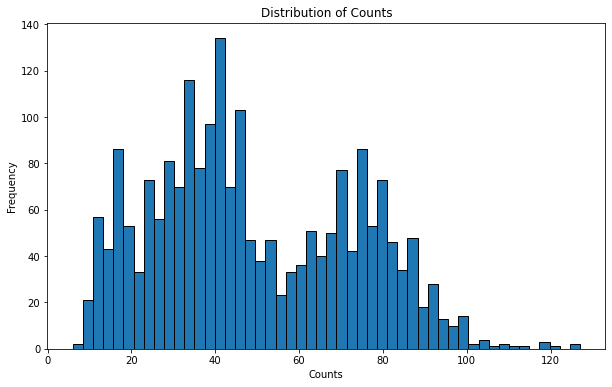

In [15]:
# 기본 통계 요약
print(datewise_counts.describe())

# 히스토그램
plt.figure(figsize=(10, 6))
datewise_counts.hist(bins=50, edgecolor='black')
plt.title("Distribution of Counts")
plt.xlabel("Counts")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

In [116]:
data_first_half.to_csv('eng_part1.csv', encoding='utf-8-sig', index=False)